# Review- Sentiment Analysis

## Importing Libraries

In [153]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
!pip install wordcloud

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/wsuser/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /home/wsuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/wsuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [154]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import string
import re
import sys
import csv
import nltk
import pandas as pd
stoplist = set(stopwords.words("english"))
import pandas as pd
from nltk.corpus import stopwords

## Importing the Datasets

In [155]:
# The code was removed by Watson Studio for sharing.

'Exploring the Reviews'

### Netflix

In [156]:
df_n.head()

,Main Title,Full Review
0,Needs More Titles,Netflix is supposed to be the one-stop- shop f...
1,BEST EXPERIENCE EVER!!!,The Best Streaming Service Comparing To All Ot...
2,Loaded with Good Shows but Poor Service,I have used netflix on both mobile app and a w...
3,Good service but issue with payments,I like watching netflix but somehow not able t...
4,Star of Entertainment,Netflix is the best platform that connects peo...


### Prime Video

In [157]:
df_p.head()

,Main Title,Full Review
0,Amazon prime video... Worth for your money???,Amazon prime video is one of the best app/webs...
1,We are getting many movies for just 129₹ pm,I I a user of this application and also have a...
2,Amazon Prime Video is it worth of purchase?,Hello guys I have used Amazon Prime for one ye...
3,Prime Video is Not Justified it's Subscription...,Brief Amazon is one the World's biggest e-...
4,Detecting videos.,The home page floods the user with Indian regi...


### Disney+ Hotstar

In [158]:
df_d.head()

,Main Title,Full Review
0,Good Catalogue,Easy to use app with good watch recommendation...
1,Very bad experience fraud hotstar,It's frudhotstar it's my request people to not...
2,Disney + Hotstar waste of money,I really took the subscription for a year just...
3,Only IPL is there and too much add,There are too many ads pop up and it shows onl...
4,VIP membership is froud,I have been using hotstar since it launched it...


## Applying VADER 

In [159]:
sentiment_p=df_p
sentiment_n=df_n
sentiment_d=df_d

analyzer = SentimentIntensityAnalyzer()
# Prime Video

sentiment_p['Prime_neg'] = [analyzer.polarity_scores(x)['neg'] for x in sentiment_p['Full Review']]
sentiment_p['Prime_neu'] = [analyzer.polarity_scores(x)['neu'] for x in sentiment_p['Full Review']]   
sentiment_p['Prime_pos'] = [analyzer.polarity_scores(x)['pos'] for x in sentiment_p['Full Review']]

# Netflix
sentiment_n['Netflix_neg'] = [analyzer.polarity_scores(x)['neg'] for x in sentiment_n['Full Review']]
sentiment_n['Netflix_neu'] = [analyzer.polarity_scores(x)['neu'] for x in sentiment_n['Full Review']]   
sentiment_n['Netflix_pos'] = [analyzer.polarity_scores(x)['pos'] for x in sentiment_n['Full Review']]

# Disney+ Hotstar

sentiment_d['Disney_neg'] = [analyzer.polarity_scores(x)['neg'] for x in sentiment_d['Full Review']]
sentiment_d['Disney_neu'] = [analyzer.polarity_scores(x)['neu'] for x in sentiment_d['Full Review']]   
sentiment_d['Disney_pos'] = [analyzer.polarity_scores(x)['pos'] for x in sentiment_d['Full Review']]

## Exporting the analysis as Dataframes

These analysed dataframes will be further be sent to the React UI Dashboard. <br>
This can be further interpreted by the user to analyze the people's sentiment to different OTTs

In [160]:

datap= [['Prime_pos' ,sentiment_p['Prime_pos'].mean()] , ['Prime_neu',sentiment_p['Prime_neu'].mean()] , [ 'Prime_neg',sentiment_p['Prime_neg'].mean()]] 
pp=pd.DataFrame(datap, columns = ['SentimentPrime','pValue'])
pp.to_csv('sentiment_pp.csv')

datan= [['Netflix_pos' ,sentiment_n['Netflix_pos'].mean()] , ['Netflix_neu',sentiment_n['Netflix_neu'].mean()] , [ 'Netflix_neg',sentiment_n['Netflix_neg'].mean()]] 
nn=pd.DataFrame(datan, columns = ['SentimentNetflix','nValue'])
nn.to_csv('sentiment_nn.csv')

datad= [['Disney_pos' ,sentiment_d['Disney_pos'].mean()] , ['Disney_neu',sentiment_d['Disney_neu'].mean()] , [ 'Disney_neg',sentiment_d['Disney_neg'].mean()]] 
dd=pd.DataFrame(datad, columns = ['SentimentDisney','dValue'])
dd.to_csv('sentiment_dd.csv')


## Sentiment Analysis

In [161]:
frames = [nn,pp,dd]
result = pd.concat(frames,axis=1)
result


,SentimentNetflix,nValue,SentimentPrime,pValue,SentimentDisney,dValue
0,Netflix_pos,0.152787,Prime_pos,0.198763,Disney_pos,0.150570
1,Netflix_neu,0.740926,Prime_neu,0.763435,Disney_neu,0.801376
2,Netflix_neg,0.106287,Prime_neg,0.037763,Disney_neg,0.048060


## WordCloud

In [162]:
def clean(tweet):
    tweet=(' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()))
    return (tweet)

def cloud(review,color):
    df = review
    df = df.applymap(lambda s:s.lower() if type(s) == str else s)
    df = df.applymap(lambda s:clean(s) if type(s) == str else s)
    df = df.apply(lambda s:Textblob(s).correct() if type(s) == str else s)
    text = df['Full Review'].tolist() + df['Main Title'].tolist()
    text = ' '.join([str(item) for item in text])
    text = nltk.word_tokenize(text)
    text = [word for word in text if word not in all_stopwords]
    words = [word for word in text if len(word)>1]
    fdist = nltk.FreqDist(words)

    filter_words = dict([(m, n) for m, n in fdist.items() if len(m) > 3])

    wcloud = WordCloud(collocations = False, background_color = color).generate_from_frequencies(filter_words)
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()


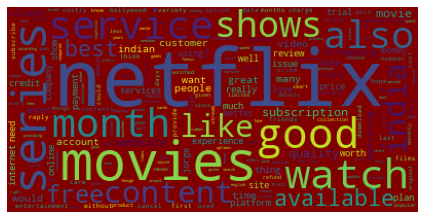

In [163]:
cloud(df_n,'maroon')


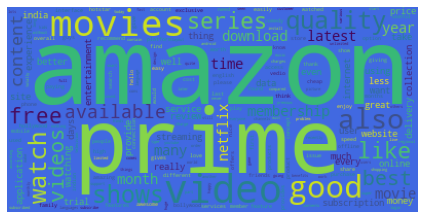

In [164]:
cloud(df_p,'royalblue')


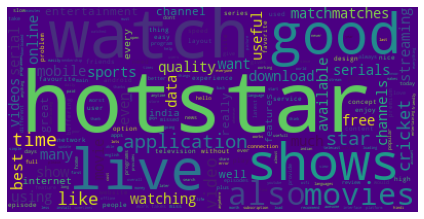

In [165]:
cloud(df_d,'indigo')


In [166]:
    
'''This Code is to send metadata for React UI '''    
# cll=[]
# for word, frequency in fdist.most_common(100):
#     cll.append({'name': word , 'weight' : frequency})
#     print(cll)
          

'This Code is to send metadata for React UI '